<h1 align="center">Klasifikasi Data Arrhythmia</h1>

**Anggota Kelompok:**

*   Fauzan Naufal Rizqi
*   Muhammad Dafa Sirajudin
*   Defryan Aprisandani



# **Import** **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt
#to avoid writing plot.show
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix,classification_report

# **READ DATA**

In [ ]:
df=pd.read_csv("arrhythmia.csv",header=None)

In [ ]:
#Melihat 5 data teratas
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
#Melihat 5 data terbawah
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


## **Deskripsi data frame**

In [ ]:
#Melihat dimensi atau ukuran dari data set

df.shape

(452, 280)

In [ ]:
#Menampilkan informasi mengenai data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [ ]:
#Memberikan penjelasan statistik deskriptif dari dataframe

df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [ ]:
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            270, 271, 272, 273, 274, 275, 276, 277, 278, 279],
           dtype='int64', length=280)

# **1**. **Preprocessing Data**

Tujuan dari preprocessing data adalah untuk membersihkan, mengorganisir, dan mengubah data menjadi bentuk yang lebih mudah dipahami dan diolah oleh algoritma atau model yang akan digunakan.

### Menangani Nilai yang Hilang

Setelah melihat dataset, ada beberapa atribut memiliki nilai yang hilang dalam bentuk
dari '?'. Maka :

- Mengganti '?' dengan numpy.NAN.
- Memasukkan nilai rata-rata menggunakan Simple Imputer.

**Checking for null values in dataset**

In [ ]:
#Menghitung jumlah total nilai null awal
pd.isnull(df).sum().sum()

0

In [ ]:
#Mengganti '?' dengan numpy.NAN.

df = df.replace('?', np.NaN)

In [ ]:
#Menghitung jumlah total akhir nilai null dalam dataset

nv=pd.isnull(df).sum().sum()
nv

408

## **Memvisualisasikan distribusi data yang hilang:**

Text(0, 0.5, 'Banyaknya nilai null di setiap kolom')

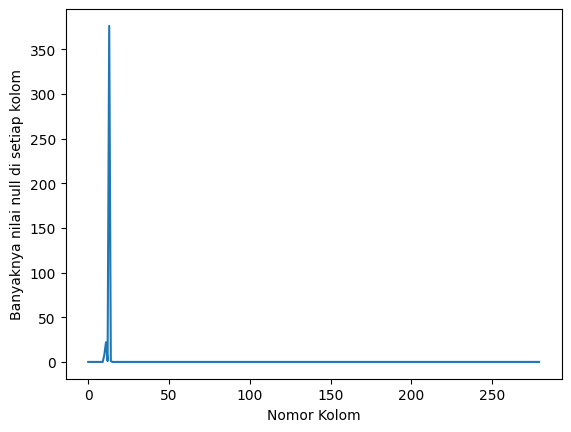

In [ ]:
pd.isnull(df).sum().plot()
plt.xlabel('Nomor Kolom')
plt.ylabel('Banyaknya nilai null di setiap kolom')

Text(0, 0.5, 'Banyaknya nilai null di setiap kolom')

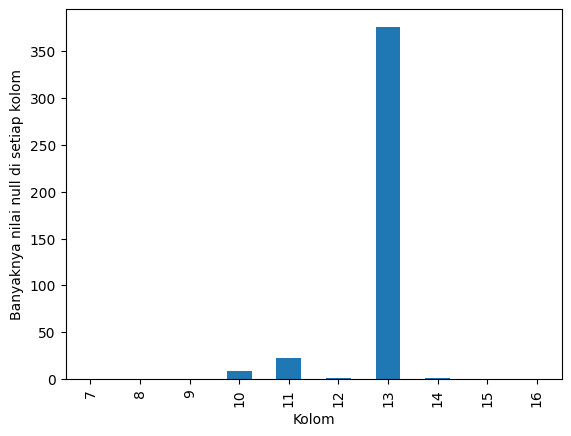

In [ ]:
#Memperbesar tampilan

pd.isnull(df).sum()[7:17].plot(kind="bar")
plt.xlabel('Kolom')
plt.ylabel('Banyaknya nilai null di setiap kolom')

Kolom 13 berisi lebih dari 350 nilai yang hilang dari total 452 instance. jadi kami akan menghapus kolom 13. atribut lain memiliki nilai nol yang relatif lebih sedikit. Jadi alih-alih menjatuhkan, kami akan mengganti nilai nol dari atribut lain dengan nilai rata-ratanya.

In [ ]:
#Menghapus kolom 13

df.drop(columns = 13, inplace=True)

## **Menggunakan strategi pengisian nilai rata-rata (mean) dalam imputasi**

Imputasi adalah proses mengisi nilai yang hilang atau yang tidak valid pada dataset dengan nilai yang memadai

In [ ]:
#Melakukan salinan untuk menghindari perubahan pada data asli (saat melakukan imputasi)

new_df = df.copy()

In [ ]:
#Membuat kolom-kolom baru yang menandakan nilai mana yang akan diimputasi

cols_with_missing = (col for col in new_df.columns if new_df[col].isnull().any())
for col in cols_with_missing:
    new_df[col] = new_df[col].isnull()

In [ ]:
#Proses Imputasi

my_imputer = SimpleImputer()
new_df = pd.DataFrame(my_imputer.fit_transform(new_df))
new_df.columns = df.columns

In [ ]:
#imputed dataframe

new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [ ]:
pd.isnull(new_df).sum().sum()

0

In [ ]:
# DataSet dengan nilai null

pd.isnull(new_df).sum()

0      0
1      0
2      0
3      0
4      0
      ..
275    0
276    0
277    0
278    0
279    0
Length: 279, dtype: int64

## **Membuat Data Set Final**

In [ ]:
#Creating column names

final_df_columns=[
                    "Age","Sex","Height","Weight","QRS_Dur", "P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate", "Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
                    "Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", "DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
                    "DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11", "AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
                    "AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11", "AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
                    "V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111", "V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
                    "V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311", "V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
                    "V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511", "V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
                    "JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave","QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
                    "DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189","AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
                    "AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209","AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
                    "V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229","V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
                    "V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249","V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
                    "V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269","V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"
                  ]

In [ ]:
#Memberikan nama kolom pada dataset

new_df.columns=final_df_columns
new_df.to_csv("new data.csv")
new_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


Setelah dataframe benar-benar dibersihkan dan diproses,kita akan menghapus atribut target dan menyimpan dataframe akhir kita.

In [ ]:
target=new_df["class"]

final_df = new_df.drop(columns ="class")

In [ ]:
final_df.shape

(452, 278)

# **2. Exploratory Data Analysis (EDA)**

Menganalisis kumpulan data untuk meringkas karakteristik utama

In [ ]:
#Membuat daftar dari semua jenis aritmia yang sesuai dengan label kelas mereka.
#membuat daftarnya dalam class_names

class_names = ["Normal", "Ischemic changes (CAD)", "Old Anterior Myocardial Infraction", "Old Inferior Myocardial Infraction",
               "Sinus tachycardy", "Sinus bradycardy", "Ventricular Premature Contraction (PVC)","Supraventricular Premature Contraction",
               "Left Boundle branch block", "Right boundle branch block", "1.Degree AtrioVentricular block", "2.Degree AV block",
               "3.Degree AV block", "Left Ventricule hypertrophy", "Atrial Fibrillation or Flutter", "Others"]

### Menganalisis kumpulan data dan memeriksa berapa banyak contoh yang kita miliki untuk setiap kelasnya:
kita harus mengurutkan dataset kita sehubungan dengan atribut kelas untuk menghitung jumlah instance yang tersedia untuk setiap kelas

In [ ]:
t=new_df.sort_values(by=["class"])

In [ ]:
# Menghitung jumlah instance setiap class
class_counts = t['class'].value_counts(sort=False).tolist()

# Menampilkan hasil
print(class_counts)

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 4, 5, 22]


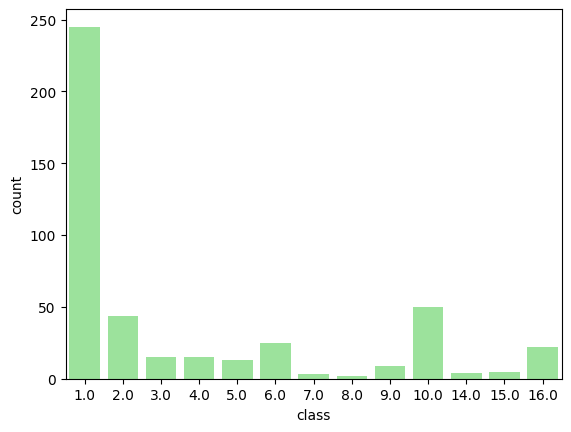

In [ ]:
sns.countplot(x ='class', data = new_df, color='lightgreen')
plt.show()

In [ ]:
# Menghitung jumlah instance setiap class
values = class_counts[:10] + [0, 0, 0] + class_counts[10:13]

# Menampilkan hasil
print(values)

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]


Hasil temuan kami menunjukkan bahwa dari total 452 contoh, sebanyak 245 contoh merupakan anggota dari kelas A yang mengacu pada orang dengan kondisi "normal". Selain itu, kami juga mengidentifikasi adanya 12 jenis aritmia yang berbeda dalam kumpulan data kami, namun terdapat 3 jenis aritmia lainnya yang tidak terdapat dalam kumpulan data tersebut.

### Handling Outliers & Data Visualization

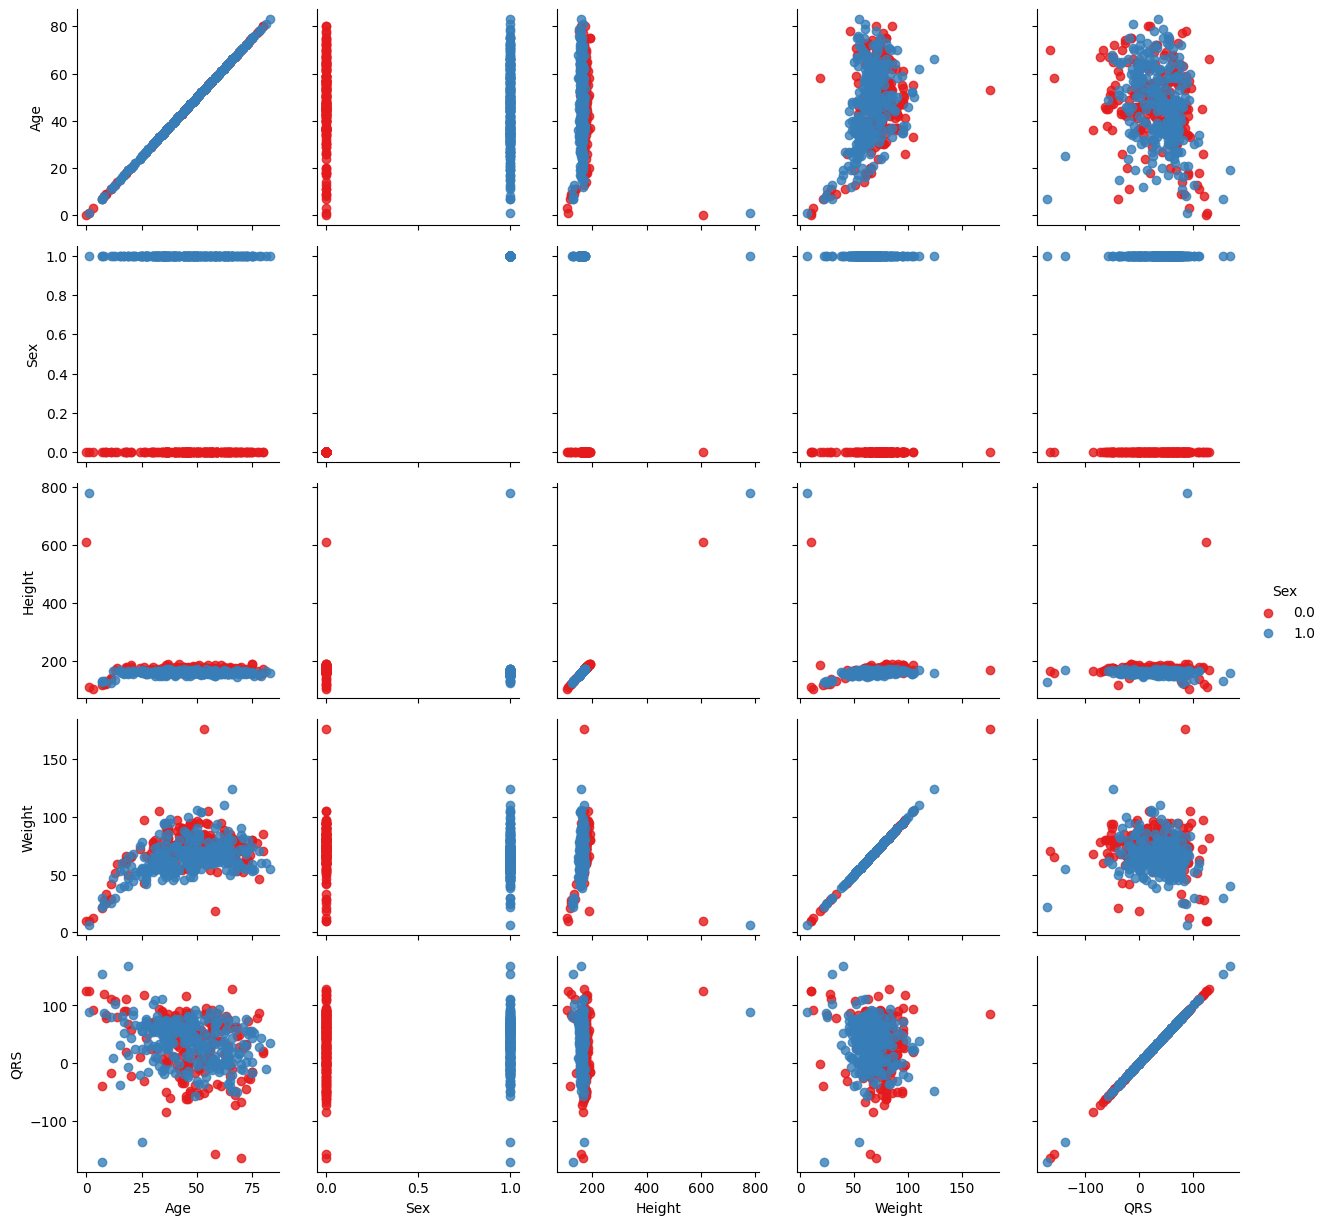

In [ ]:
#Melihat hubungan antar variabel/atribut dan adanya outliers

g = sns.PairGrid(final_df, vars=['Age', 'Sex', 'Height', 'Weight', 'QRS'], hue='Sex', palette='Set1')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

 Berdasarkan plot scatter, terdapat beberapa data outlier pada atribut 'height' dan 'weight'.

Periksa nilai maksimum dua atribut tersebut lebih lanjut

In [ ]:
# sorted(final_df['Height'], reverse=True)[:10]

height_list = sorted(final_df['Height'], reverse=True)[:10]
output = []
for height in height_list:
    output.append(height)
print(output)


[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]


Karena orang tertinggi yang pernah hidup di dunia menurut rekor adalah Robert Wadlow : **272** cm, maka **780** dan **608** perlu diganti dengan **180** cm dan **108** cm

In [ ]:
final_df['Height']=final_df['Height'].replace(608,108)
final_df['Height']=final_df['Height'].replace(780,180)

In [ ]:
weight_list = sorted(final_df['Weight'], reverse=True)[:10]
output = []
for weight in weight_list:
    output.append(weight)
print(output)


[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]


Karena orang terberat di dunia menurut rekor adalah Jon Brower : 635 kg, maka **176 kg** adalah berat yang masih mungkin, jadi kita tidak akan menggantinya.

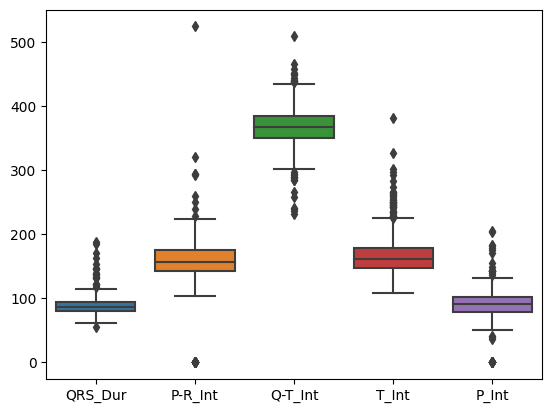

In [ ]:
sns.boxplot(data=final_df[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);


Interval PR adalah periode, diukur dalam milidetik, yang memanjang dari awal gelombang P hingga awal kompleks QRS; biasanya berdurasi antara 120 dan 200 ms.

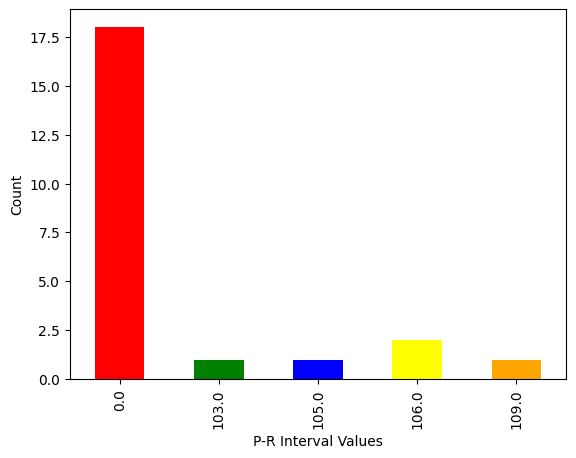

In [ ]:
#data head

final_df['P-R_Int'].value_counts().sort_index().head().plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'orange'])
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

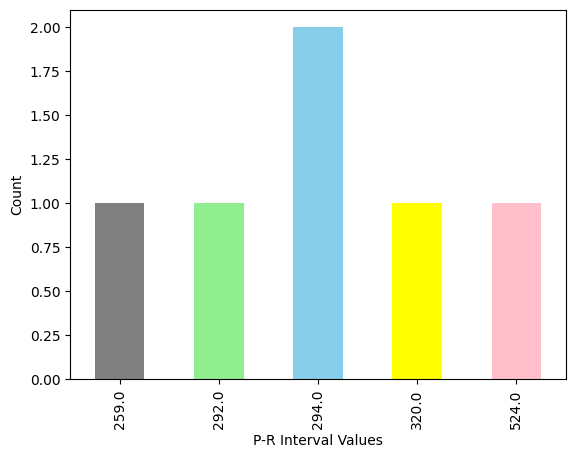

In [ ]:
#data tail

final_df['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar', color=['grey', 'lightgreen', 'skyblue', 'yellow', 'pink'])
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

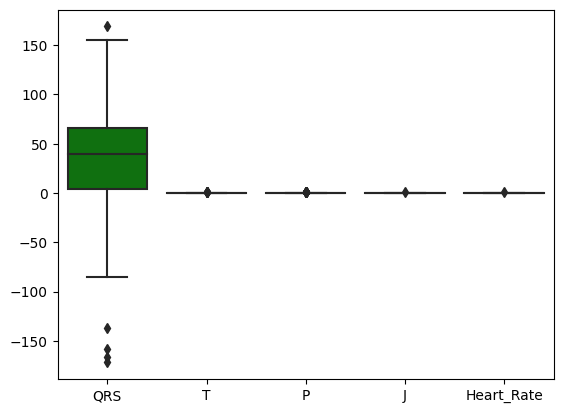

In [ ]:
sns.boxplot(data=final_df[["QRS","T","P","J","Heart_Rate"]], color="green");

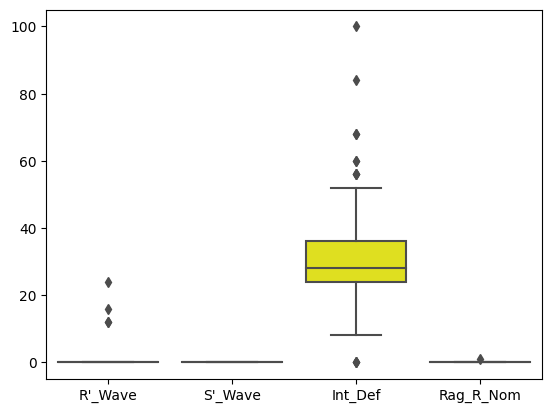

In [ ]:
sns.boxplot(data=final_df[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]], color="yellow");

*S*'Wave memiliki angka 0 yang bukan merupakan NaN. Jadi, kita tidak dapat menganggapnya sebagai outlier.

In [ ]:
final_df["S'_Wave"].value_counts().sort_index(ascending=False)

0.0    452
Name: S'_Wave, dtype: int64

In [ ]:
final_df["V101"].value_counts().sort_index(ascending=False)

216.0     1
112.0     1
84.0      1
72.0      1
68.0      1
64.0      1
48.0      6
44.0      6
40.0     13
36.0     36
32.0     63
28.0     81
24.0     88
20.0     57
16.0     13
12.0      4
0.0      79
Name: V101, dtype: int64


V101 memiliki outlier, tetapi ketika kita melihat set lainnya (V201, V301, V501), kita dapat melihat bahwa ada outlier yang serupa. Karena data kita sangat condong, kita tidak bisa menyimpulkan bahwa outlier-outlier ini harus dihapus.

In [ ]:
final_df["V201"].value_counts().sort_index(ascending=False)

216.0     1
136.0     1
84.0      1
72.0      1
60.0      5
56.0      4
52.0     12
48.0     19
44.0     53
40.0     68
36.0     74
32.0     69
28.0     48
24.0     39
20.0     15
16.0      6
12.0      2
0.0      34
Name: V201, dtype: int64

In [ ]:
final_df["V301"].value_counts().sort_index(ascending=False)

132.0     1
88.0      2
76.0      2
72.0      1
68.0      2
64.0      3
60.0     16
56.0     26
52.0     57
48.0     68
44.0     76
40.0     74
36.0     49
32.0     32
28.0     13
24.0      4
20.0      6
16.0      1
0.0      19
Name: V301, dtype: int64

In [ ]:
final_df["V501"].value_counts().sort_index(ascending=False)

136.0      1
120.0      2
116.0      1
108.0      1
96.0       1
92.0       1
84.0       1
76.0       2
72.0       3
68.0       4
64.0       5
60.0       9
56.0      22
52.0      67
48.0     105
44.0     104
40.0      73
36.0      29
32.0      12
28.0       3
24.0       2
20.0       1
0.0        3
Name: V501, dtype: int64

Sekarang kita dapat melihat pencilan dalam dua atribut terakhir dari setiap seri (DIII188, DIII189, AVR198, AVR199, AVL208, AVL209, AVF218, AVF219, V2238, V2239, V3248, V3249, V4258, V4259, V5268, V5269, V6278, V6279). Dengan asumsi yang sama bahwa pencilan ini mungkin termasuk dalam kelas dengan sedikit contoh.

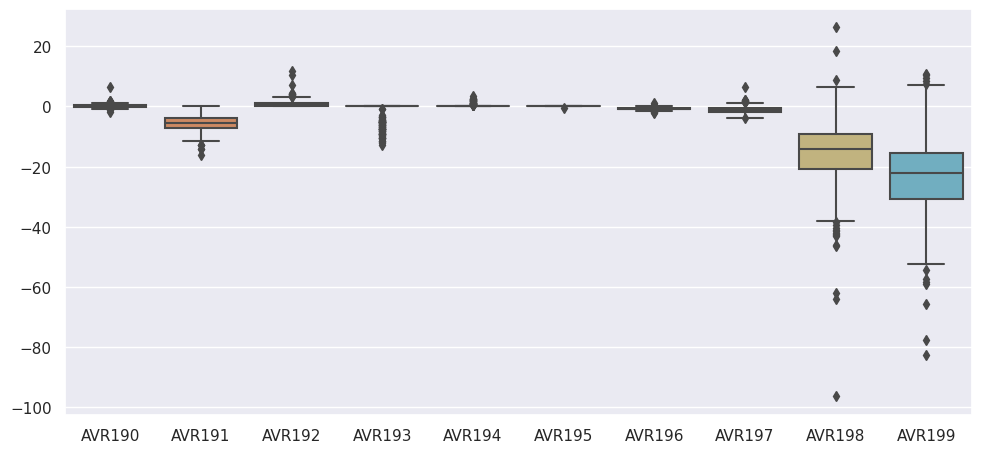

In [ ]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199"]]);

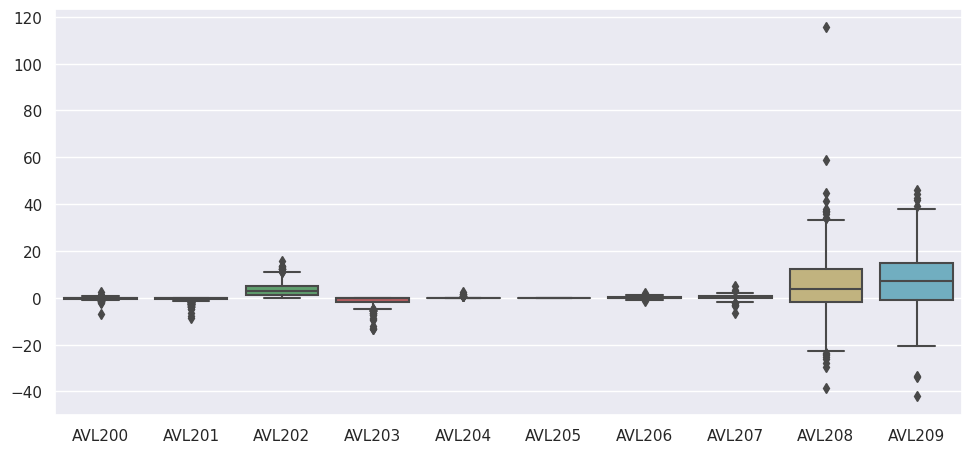

In [ ]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209"]]);

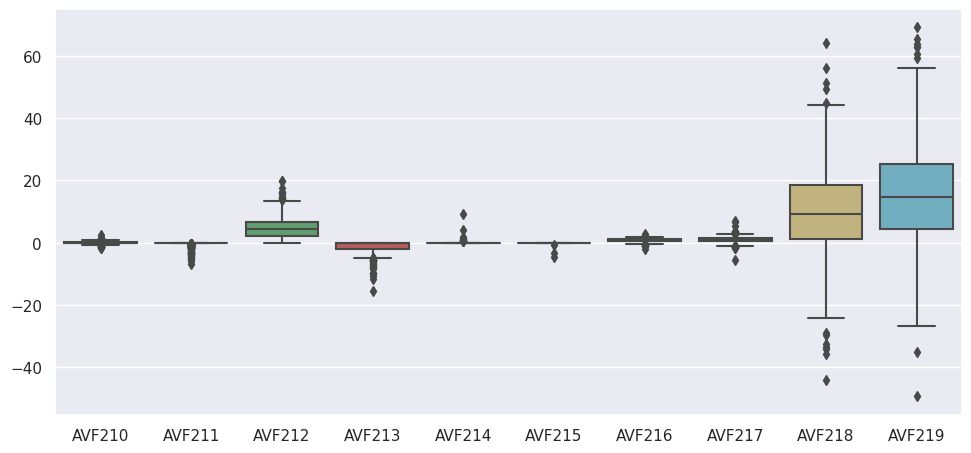

In [ ]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219"]]);

In [ ]:
#Mencari korelasi dengan fitur target menggunakan korelasi Pearson.

target = new_df["class"]
pearsoncorr = final_df.corrwith(target, method='pearson')
pearsoncorr_values = pearsoncorr.values

print(pearsoncorr_values)

[-9.23812218e-02 -1.78080037e-01 -3.46671442e-02 -9.01507390e-02
  3.23878728e-01 -9.99540161e-02  2.83049762e-02  9.76253981e-02
 -1.22002504e-01  1.95854526e-02 -1.68648870e-04  1.90644217e-01
 -3.08114850e-02  3.33672764e-02  3.96491896e-03  4.26738126e-02
  1.95198200e-01  6.39992472e-02             nan  4.27635327e-02
 -2.01150248e-02  7.67517615e-03 -3.55694451e-02  3.20969797e-02
  3.20969797e-02  8.30559434e-02 -3.61168680e-03  4.83674292e-02
  1.83082712e-01 -1.05049431e-02  6.65428889e-02  6.77662940e-02
  4.17574601e-02  7.98435069e-02 -2.01150248e-02  1.69531020e-02
 -3.60504699e-02 -6.66334979e-04 -2.36687153e-02  1.16515578e-01
  8.16735582e-02  1.44307782e-02 -3.20137575e-02  8.34076694e-02
 -3.08114850e-02  5.14341059e-02 -3.08114850e-02 -8.40208668e-02
 -1.15446555e-02 -5.76271452e-03  2.10381327e-02  1.73243101e-01
  2.54790200e-03  1.09423863e-01 -3.08114850e-02  1.41103081e-01
 -6.43991926e-02  3.20969797e-02 -3.60504699e-02 -5.76271452e-03
 -5.76271452e-03  4.01270

### Plot atau Diagram tambahan

In [ ]:
final_df

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1.0,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5
448,37.0,0.0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,-0.5,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4
449,36.0,0.0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,1.2,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2
450,32.0,1.0,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,0.2,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6


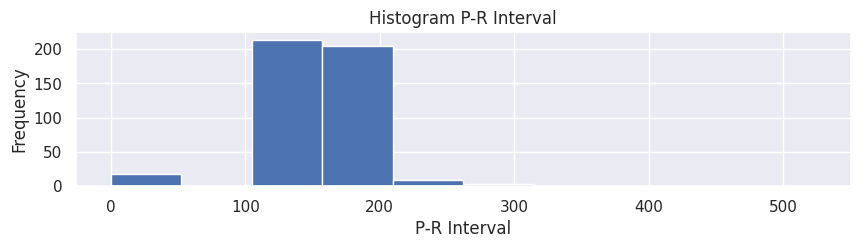

In [ ]:
# Menampilkan histogram P-R Interval
plt.figure(figsize=(10, 2))
final_df['P-R_Int'].hist()

# Memberi judul pada plot dan sumbu-sumbunya
plt.title('Histogram P-R Interval')
plt.xlabel('P-R Interval')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

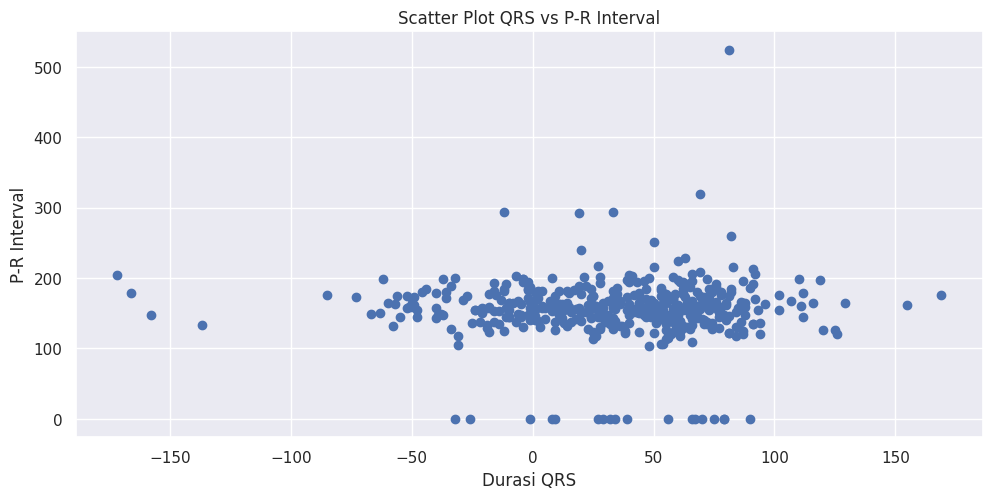

In [ ]:
# Data QRS dan P-R Interval
qrs_data = final_df['QRS']
pr_interval_data = final_df['P-R_Int']

# Membuat scatter plot
plt.scatter(qrs_data, pr_interval_data)

# Memberi judul pada plot dan sumbu-sumbunya
plt.title('Scatter Plot QRS vs P-R Interval')
plt.xlabel('Durasi QRS')
plt.ylabel('P-R Interval')

# Menampilkan plot
plt.show()

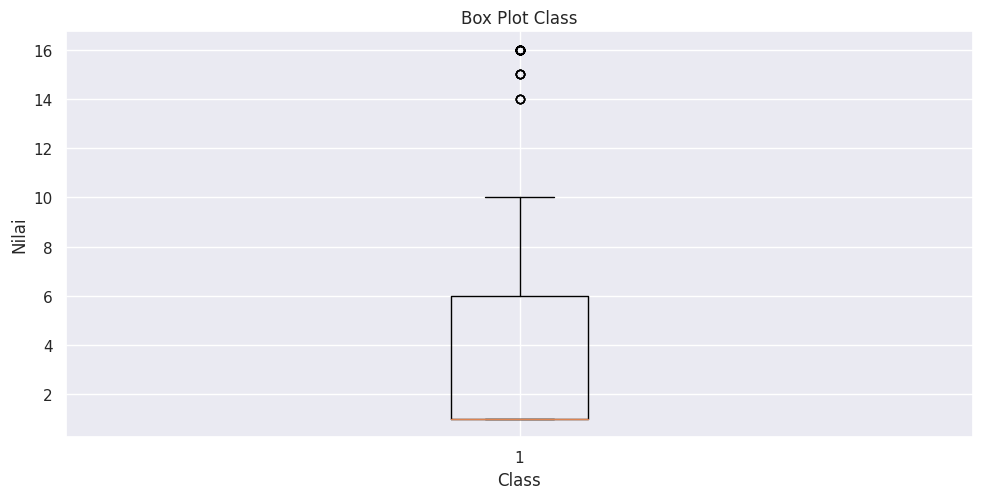

In [ ]:
# Data kelas
class_data = new_df['class']

# Membuat box plot
plt.boxplot(class_data)

# Memberi judul pada plot dan sumbu-sumbunya
plt.title('Box Plot Class')
plt.xlabel('Class')
plt.ylabel('Nilai')

# Menampilkan plot
plt.show()

## **Fitur Penskalaan dan Pemisahan pada dataset**
<br />
Kami akan menggunakan 80% dari dataset kami untuk tujuan pelatihan dan 20% untuk tujuan pengujian.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df, target ,test_size=0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Mengevaluasi strategi


Karena variabel dependen adalah variabel kategorikal, kita akan menggunakan model klasifikasi. Strategi evaluasi terbaik untuk model klasifikasi adalah membandingkan presisi dan recall. Ketika mempertimbangkan metrik evaluasi klasifikasi, pentingnya prediksi yang akurat dari model kita (kita tidak bisa menerima hasil yang memberi probabilitas mengatakan kepada orang sehat bahwa mereka memiliki Aritmia Jantung (FN)).

Kita akan fokus pada Sensitivitas (persentase orang yang sakit yang diidentifikasi dengan benar memiliki kondisi tersebut) bukan Spesifisitas (persentase orang sehat yang diidentifikasi dengan benar tidak memiliki kondisi tersebut).

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing evaluation metrices.

from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
from scikitplot.metrics import plot_confusion_matrix,plot_roc

# **3. Modeling**

In [ ]:
# result akan menyimpan hasil setiap model nantinya

result = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

## **kNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train, y_train)
y_pred = knnclassifier.predict(X_test)

In [ ]:
knn_train_accuracy = accuracy_score(y_train, knnclassifier.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knnclassifier.predict(X_test))
knn_train_recall = recall_score(y_train, knnclassifier.predict(X_train),average="weighted")
knn_test_recall = recall_score(y_test, knnclassifier.predict(X_test),average="weighted")

In [ ]:
print('Train Recall score: {}'
      .format(knn_train_recall))
print('Test Recall score: {}'
      .format(knn_test_recall))
confusion_matrix(y_test, y_pred)

Train Recall score: 0.6481994459833795
Test Recall score: 0.6483516483516484


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [ ]:
result = result.append(pd.Series({'Model':'KNN ','Train Accuracy':knn_train_accuracy,'Test Accuracy':knn_test_accuracy}),ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,KNN,0.648199,0.648352


## **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=5)
dtclassifier.fit(X_train, y_train)
y_pred_test = dtclassifier.predict(X_test)
y_pred_train = dtclassifier.predict(X_train)

In [ ]:
dt_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
dt_test_recall = recall_score(y_test, y_pred_test,average="weighted")
dt_train_accuracy = accuracy_score(y_train,y_pred_train )
dt_test_accuracy = accuracy_score(y_test, y_pred_test)


In [ ]:
print('Train Recall score: {}'
      .format(dt_train_recall))
print('Test Recall score: {}'
      .format(dt_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7894736842105263
Test Recall score: 0.6813186813186813


array([[50,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 4,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0,  0,  0,  4,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0]])

In [ ]:
result = result.append(pd.Series({'Model':'Decision Tree ','Train Accuracy':dt_train_recall,'Test Accuracy':dt_test_recall}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN,0.648199,0.648352
1,Decision Tree,0.789474,0.681319


Kita menemukan bahwa model terbaik dalam hal skor recall adalah Decision tree dengan persentase akurasi sebesar **68.13%** dibandingkan model lainnya.

---
---

# **PCA**

Kita akan menggunakan PCA (Principal Component Analysis) untuk mengurangi dimensi dari dataset sampel guna mendapatkan fitur terbaik untuk mencapai akurasi yang lebih baik.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.98)
pca.fit(X_train)
pca.n_components_

121

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV

## **KNN with PCA**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnp_clf = KNeighborsClassifier(n_neighbors=5)
knnp_clf.fit(X_train_pca, y_train)
y_pred_train = knnp_clf.predict(X_train_pca)
y_pred_test = knnp_clf.predict(X_test_pca)

In [ ]:
knnp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
knnp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
knnp_train_accuracy = accuracy_score(y_train, y_pred_train)
knnp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:

print('Train Recall score: {}'
      .format(knnp_train_recall))
print('Test Recall score: {}'
      .format(knnp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.6454293628808865
Test Recall score: 0.6483516483516484


array([[51,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 6,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [ ]:
result = result.append(pd.Series({'Model':'KNN dengan PCA','Train Accuracy':knnp_train_accuracy,'Test Accuracy':knnp_test_accuracy}),ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,KNN,0.648199,0.648352
1,Decision Tree,0.789474,0.681319
2,KNN dengan PCA,0.645429,0.648352


Disini kita tidak menemukan adanya peningkatan pada data PCA dengan model klasifikasi kNN.

## **DecisionTree dengan PCA**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 2,max_depth=5)
dt_clf.fit(X_train_pca, y_train)
y_pred_train = dt_clf.predict(X_train_pca)
y_pred_test = dt_clf.predict(X_test_pca)

In [ ]:
dtp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
dtp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
dtp_train_accuracy = accuracy_score(y_train, y_pred_train)
dtp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:
print('Train Recall score: {}'
      .format(dtp_train_recall))
print('Test Recall score: {}'
      .format(dtp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7534626038781164
Test Recall score: 0.6043956043956044


array([[46,  4,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 4,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  1,  0,  0,  0,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 6,  2,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0]])

In [ ]:
result = result.append(pd.Series({'Model':'DecisionTree dengan PCA','Train Accuracy':dtp_train_accuracy,'Test Accuracy':dtp_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN,0.648199,0.648352
1,Decision Tree,0.789474,0.681319
2,KNN dengan PCA,0.645429,0.648352
3,DecisionTree dengan PCA,0.753463,0.604396


---
---

# Result

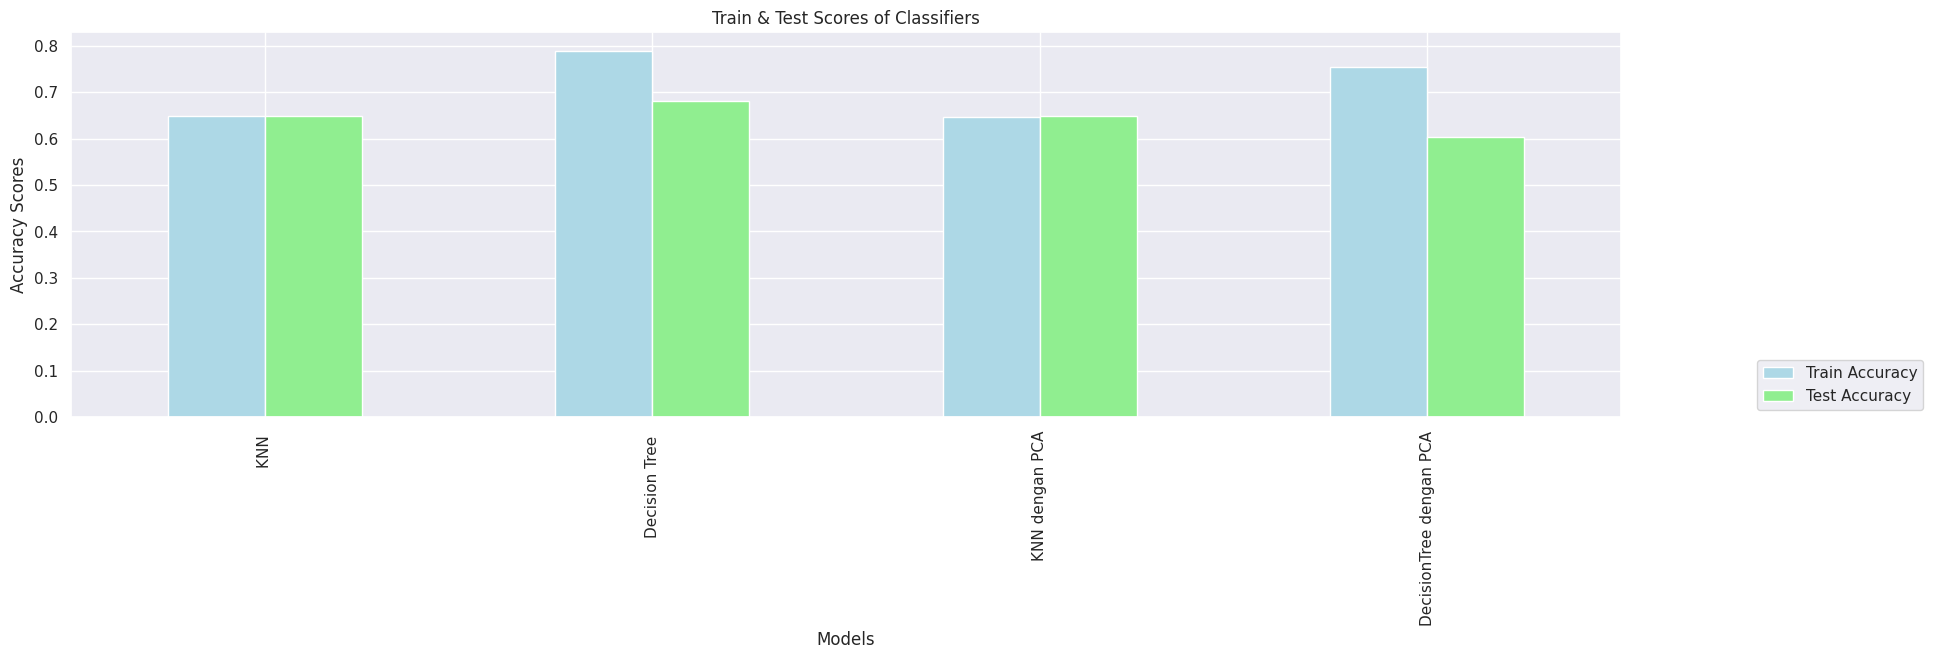

In [ ]:
ax=result.plot(kind="bar",figsize=(20,5), color=['lightblue', 'lightgreen'])
ax.set_xticks(result.index)
ax.set_xticklabels(result.Model,rotation=90)
plt.title('Train & Test Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show();

## Kesimpulan

Model terbaik dalam hal skor recall adalah **Decision Tree Classifier** dengan akurasi sebesar **68,13%.**